In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Health Exploration and Analytics
## What makes us sick? <br/>
## Author: Stanislav Dimitrov

### General question
How does the environment we live in influence our health?

## 1. Demographics and economics

### 1.1. Problem definition
How do economical factors influence health across countries?

### 1.2. Data acquisition
- Economic factors data: agriculture_gdp_pct, industry_gdp_pct, services_gdp_pct (which including health care)
- Demographic factors data: under_five_mortality_rate, urban_population_pct, life_expectancy_at_birth
- Direct factors data: carbon_dioxide_emissions_per_capita
- Indirect factors data: coal_consumption_per_capita, electricity_consumption_per_capita, total_health_expenditure_gdp_pct <br><br>



Source: [Gapminder](https://www.gapminder.org)

### 1.3. Data selection motivation
- agriculture, industry and services corespond to the three main economic sectors
- children mortatlity is a key demographic indicator and an important measurer of health state on the entire population
- people's life expectancy is an important demographic factor to determine the quality of life
- air quality directly affects the people's health
- assume that coal consumption indireclty affects health trough harmful emmisions as a result of their burning
- assume that electricity consumption indirectly affects health because it depends mostly on coal which probably increase coal consumption and carbon dioxide emissions respectively
- assume that the percent of urban population affects health with much carbon emissions from one side and better healh providing from the other
- assume that more expenditure for healthcare improves health in general

### 1.4. Read, tidy,  clean and validate data

In [3]:
def rename_country_column(dataframe):
    """
    Rename df first column to `country`
    """
    dataframe.columns.values[0] = "country"
    
    return dataframe

In [4]:
def column_from_index(dataframe):
    """
    Convert df index into `country` column
    """
    dataframe['country'] = dataframe.index
    
    return dataframe

In [5]:
def convert_year_column(dataframe):
    """
    Convert df `year` column to type `int`
    """
    dataframe['year'] = dataframe['year'].astype(int)
    
    return dataframe

In [6]:
def melt_data(dataframe, column_name):
    """
    Melt df to the desired column
    """
    dataframe = pd.melt(dataframe,
        id_vars = ["country"],
        var_name = "year",
        value_name = column_name)
                        
    return dataframe

In [7]:
def merge_datasets(dataframes):
    """
    Merge multiple df on keys `country`, `year` keys
    """
    merge_keys = ['country', 'year']
    
    # first element is the left df
    merged = dataframes[0].copy()
    
    # the rest are the right df
    dataframes.pop(0)
    
    for df in dataframes:
        merged = merged.merge(df, how = "outer", on = merge_keys, sort = True)
    
    return merged

In [8]:
def fill_na(dataframe, column_names):
    """
    Fill df missing values with the `mean` value of each column by indexed `country`
    """
    for name in column_names:
        dataframe[name].fillna(dataframe.groupby('country')[name].transform('mean'), inplace = True)
    
    return dataframe

In [9]:
def show_line_plot(*arg, y_label, title, legend = False):
    """
    Draws line plot
    """
    for tupl in arg:
        plt.plot(tupl[0], tupl[1], color = tupl[2], label = tupl[3])

    plt.xlabel("Years")
    plt.ylabel(y_label)
    plt.title(title)
    
    if legend:
        plt.legend()
    
    plt.show()

In [10]:
def plot_barchart(distribution, title, x_label, y_label):
    """
    Draws barchart
    """
    plt.bar(distribution.index, distribution.values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.show()

In [11]:
def show_scatter(x, y, x_label, y_label, title):
    """
    Draws scatter plot
    """
    plt.figure(figsize = (10, 6))
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.show()

####  1.4.1 Process agriculture_gdp_pct (% of GDP)

In [12]:
agro_data = pd.read_excel("data/agriculture_gdp_pct.xlsx")
agro_data.head()

,"Agriculture, value added (% of GDP)",1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN


In [13]:
agro_data = rename_country_column(agro_data)
agro_data = melt_data(agro_data, "agriculture")
agro_data = convert_year_column(agro_data)
agro_data.head()

,country,year,agriculture
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,NaN
4,Algeria,1961,NaN


#### 1.4.2. Process industry_gdp_pct (% of GDP)

In [14]:
industry_data = pd.read_excel("data/industry_gdp_pct.xlsx")
industry_data.head()

,"Industry, value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.722679,18.650846,23.358852,25.275687,28.204721,25.818468,25.978376,21.214793,22.167053,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.517023,21.085911,21.199999,21.500000,20.298799,19.664773,19.086442,19.358809,19.309736,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,37.72878,41.105581,42.385889,42.263761,...,53.088639,54.817740,56.354391,61.310433,62.297104,61.283007,62.118578,62.123462,62.123462,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
industry_data = rename_country_column(industry_data)
industry_data = melt_data(industry_data, "industry")
industry_data = convert_year_column(industry_data)
industry_data.head()

,country,year,industry
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


#### 1.4.3. Process services_gdp_pct (% of GDP)

In [16]:
services_data = pd.read_excel("data/services_gdp_pct.xlsx")
services_data.head()

,"Services, etc., value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.118842,35.335311,35.047044,35.243897,39.206221,39.686699,45.887136,47.607657,47.917623,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.171355,54.917882,55.300002,55.700000,57.701201,59.217972,60.608903,60.239255,60.530235,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,49.395007,49.757166,47.28345,46.882862,...,36.907758,34.691024,33.457119,30.467911,29.714108,30.691648,30.961322,30.960967,30.960967,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
services_data = rename_country_column(services_data)
services_data = melt_data(services_data, "services")
services_data = convert_year_column(services_data)
services_data.head()

,country,year,services
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


#### 1.4.4 Process carbon_dioxide_emissions_per_capita (metric tons of CO2 per capita)

In [18]:
carbon_data = pd.read_excel("data/carbon_dioxide_emissions_per_capita.xlsx")
carbon_data.head()

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [19]:
carbon_data = rename_country_column(carbon_data)
carbon_data = melt_data(carbon_data, "carbon_dioxide")
carbon_data = convert_year_column(carbon_data)
carbon_data.head()

,country,year,carbon_dioxide
0,Abkhazia,1751,NaN
1,Afghanistan,1751,NaN
2,Akrotiri and Dhekelia,1751,NaN
3,Albania,1751,NaN
4,Algeria,1751,NaN


#### 1.4.5. Process coal_consumption_per_capita (tonnes oil equivalent per capita)

In [20]:
coal_data = pd.read_excel("data/coal_consumption_per_capita.xlsx")
coal_data.head()

,Coal Consumption per person (tonnes oil equivalent),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,0.005871,0.00556,0.004136,0.004249,0.005248,0.006038,0.002118,0.002055,0.001993,...,0.019019,0.01877,0.018737,0.016784,0.017459,0.017047,0.016789,0.005494,NaN,NaN


In [21]:
coal_data = rename_country_column(coal_data)
coal_data = melt_data(coal_data, 'coal_consumption')
coal_data = convert_year_column(coal_data)
coal_data.head()

,country,year,coal_consumption
0,Abkhazia,1965,NaN
1,Afghanistan,1965,NaN
2,Akrotiri and Dhekelia,1965,NaN
3,Albania,1965,NaN
4,Algeria,1965,0.005871


#### 1.4.6. Process electricity_consumption_per_capita (kWh per capita)

In [22]:
electricity_data = pd.read_excel('data/electricity_consumption_per_capita.xlsx')
electricity_data.head()

,"Electricity consumption, per capita (kWh)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1459.433092,1378.656751,1691.749604,1622.587317,1146.694855,1137.949266,1510.482138,1706.976899,1800.870627,2021.634918
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,714.702866,768.798600,785.622933,869.352620,840.780713,870.586163,920.914005,841.320010,986.865004,1090.565936


In [23]:
electricity_data = rename_country_column(electricity_data)
electricity_data = melt_data(electricity_data, 'electricity_consumption')
electricity_data = convert_year_column(electricity_data)
electricity_data.head()

,country,year,electricity_consumption
0,Abkhazia,1960,NaN
1,Afghanistan,1960,NaN
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,NaN
4,Algeria,1960,NaN


#### 1.4.7. Process urban_population_pct (% of total)

In [24]:
urban_pop_data = pd.read_excel("data/urban_population_pct.xlsx")
urban_pop_data.head()

,Urban population (% of total),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,8.0,8.2650,8.5370,8.8090,9.0810,9.353,9.6886,10.0242,10.3598,...,21.1026,21.3624,21.6222,21.882,22.1534,22.4248,22.6962,22.9676,23.239,23.5472
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,30.7,30.8100,30.9150,31.0200,31.1250,31.230,31.3320,31.4340,31.5360,...,43.7662,44.7788,45.7914,46.804,47.9076,49.0112,50.1148,51.2184,52.322,53.3846
4,Algeria,30.5,31.9366,33.3632,34.7898,36.2164,37.643,38.0144,38.3858,38.7572,...,63.1478,64.3282,65.5086,66.689,67.7560,68.8230,69.8900,70.9570,72.024,72.8650


In [25]:
urban_pop_data = rename_country_column(urban_pop_data)
urban_pop_data = melt_data(urban_pop_data, 'urban_percent')
urban_pop_data  = convert_year_column(urban_pop_data)
urban_pop_data.head()

,country,year,urban_percent
0,Abkhazia,1960,NaN
1,Afghanistan,1960,8.0
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,30.7
4,Algeria,1960,30.5


#### 1.4.8. Process life_expectancy_at_birth (years)

In [26]:
life_exp_data = pd.read_excel('data/life_expectancy_at_birth.xlsx')
life_exp_data.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [27]:
life_exp_data = rename_country_column(life_exp_data)
life_exp_data = melt_data(life_exp_data, 'life_expectancy')
life_exp_data = convert_year_column(life_exp_data)
life_exp_data.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


#### 1.4.9. Process under_five_mortality_rate (per 1,000 live births)

In [28]:
under_five_mortality_data = pd.read_excel('data/under_five_mortality_rate.xlsx')
under_five_mortality_data.head()

,CME under 5 mortality,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.2,125.9,122.7,119.4,116.3,113.4,109.7,106.7,103.9,101.1
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.5,22.2,21.0,19.7,18.7,17.8,16.9,15.8,15.0,14.3
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.3,40.7,39.0,37.7,36.4,34.9,33.5,32.1,31.3,29.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.3,4.1,4.0,3.9,3.7,3.6,3.5,3.3
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.2,187.1,183.3,179.1,175.6,172.0,167.4,164.5,161.0,157.6


In [29]:
under_five_mortality_data = rename_country_column(under_five_mortality_data)
under_five_mortality_data = melt_data(under_five_mortality_data, 'under_five_mortality_rate')
under_five_mortality_data = convert_year_column(under_five_mortality_data)
under_five_mortality_data.head()

,country,year,under_five_mortality_rate
0,Afghanistan,1931,NaN
1,Albania,1931,NaN
2,Algeria,1931,NaN
3,Andorra,1931,NaN
4,Angola,1931,NaN


#### 1.4.10. Process total_health_expenditure_gdp_pct (% of GDP)

In [30]:
health_exp_data = pd.read_excel('data/total_health_expenditure_gdp_pct.xlsx')
health_exp_data.head()

,Total expenditure on health as percentage of GDP (gross domestic product),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.716590,6.819749,6.356457,6.630313,6.769914,7.301355,6.979427,7.579306,7.584483
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2.559558,4.041886,4.806430,5.338640,5.833766,6.350044,6.044854,6.277196,6.163815,6.883454,6.840532,6.731867,6.877242,6.748861,6.883065,6.547298
4,Algeria,4.173543,3.788035,4.060305,4.063201,3.868854,3.489033,3.837877,3.873390,3.744365,3.378307,3.064177,3.129454,3.534485,3.733193,4.576056,4.172063


In [31]:
health_exp_data = rename_country_column(health_exp_data)
health_exp_data = melt_data(health_exp_data, 'health_expenditure')
health_exp_data = convert_year_column(health_exp_data)
health_exp_data.head()

,country,year,health_expenditure
0,Abkhazia,1995,NaN
1,Afghanistan,1995,NaN
2,Akrotiri and Dhekelia,1995,NaN
3,Albania,1995,2.559558
4,Algeria,1995,4.173543


In [32]:
# merge all processed economy datasets into one df
all_economy_data = merge_datasets([
    agro_data, industry_data, services_data, 
    coal_data, electricity_data, carbon_data, 
    under_five_mortality_data, urban_pop_data, life_exp_data, health_exp_data
])

# set multiindex
all_economy_data.set_index(["country", "year"], verify_integrity = True, inplace = True)

all_economy_data.head()

agriculture  industry  services  coal_consumption  \
country  year                                                      
Abkhazia 1751          NaN       NaN       NaN               NaN   
         1755          NaN       NaN       NaN               NaN   
         1762          NaN       NaN       NaN               NaN   
         1763          NaN       NaN       NaN               NaN   
         1764          NaN       NaN       NaN               NaN   

               electricity_consumption  carbon_dioxide  \
country  year                                            
Abkhazia 1751                      NaN             NaN   
         1755                      NaN             NaN   
         1762                      NaN             NaN   
         1763                      NaN             NaN   
         1764                      NaN             NaN   

               under_five_mortality_rate  urban_percent  life_expectancy  \
country  year                                                              
Abkhazia 1751                        NaN            NaN              NaN   
         1755                        NaN            NaN              NaN   
         1762                        NaN            NaN              NaN   
         1763                        NaN            NaN              NaN   
         1764                        NaN            NaN              NaN   

               health_expenditure  
country  year                      
Abkhazia 1751                 NaN  
         1755                 NaN  
         1762                 NaN  
         1763                 NaN  
         1764                 NaN

In [33]:
all_economy_data.index.get_level_values('country').unique().tolist()

['Abkhazia',
 'Afghanistan',
 'Akrotiri and Dhekelia',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Rep.',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Chinese Taipei',
 'Christian',
 'Christmas Island',
 'Coastline',
 'Cocos Island',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Is',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Re

In [34]:
# select countries from all parts of Europe
countries = ['Switzerland', 'Italy', 'Germany', 'Bulgaria', 'United Kingdom', 'France', 'Romania', 'Spain', 'Denmark', 'Sweden', 'Ukraine', 'Finland']
filtered_economy_data = all_economy_data[all_economy_data.index.get_level_values('country').isin(countries)]
filtered_economy_data.shape

(3084, 10)

In [35]:
# select last 30 years
filtered_economy_data = filtered_economy_data[filtered_economy_data.index.get_level_values('year') >= 1986]
filtered_economy_data.shape

(372, 10)

In [36]:
filtered_economy_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 372 entries, (Bulgaria, 1986) to (United Kingdom, 2016)
Data columns (total 10 columns):
agriculture                  297 non-null float64
industry                     294 non-null float64
services                     294 non-null float64
coal_consumption             312 non-null float64
electricity_consumption      308 non-null float64
carbon_dioxide               318 non-null float64
under_five_mortality_rate    312 non-null float64
urban_percent                312 non-null float64
life_expectancy              372 non-null float64
health_expenditure           192 non-null float64
dtypes: float64(10)
memory usage: 35.0+ KB


In [37]:
# fill NaN values with the mean value of each column grouped by `country`
filtered_economy_data = fill_na(filtered_economy_data, ['agriculture', 'industry', 'services', 'coal_consumption', 'electricity_consumption', 'carbon_dioxide', 'under_five_mortality_rate', 'urban_percent', 'health_expenditure'])
filtered_economy_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 372 entries, (Bulgaria, 1986) to (United Kingdom, 2016)
Data columns (total 10 columns):
agriculture                  372 non-null float64
industry                     372 non-null float64
services                     372 non-null float64
coal_consumption             372 non-null float64
electricity_consumption      372 non-null float64
carbon_dioxide               372 non-null float64
under_five_mortality_rate    372 non-null float64
urban_percent                372 non-null float64
life_expectancy              372 non-null float64
health_expenditure           372 non-null float64
dtypes: float64(10)
memory usage: 35.0+ KB


### 1.5. Exploratory data analysis

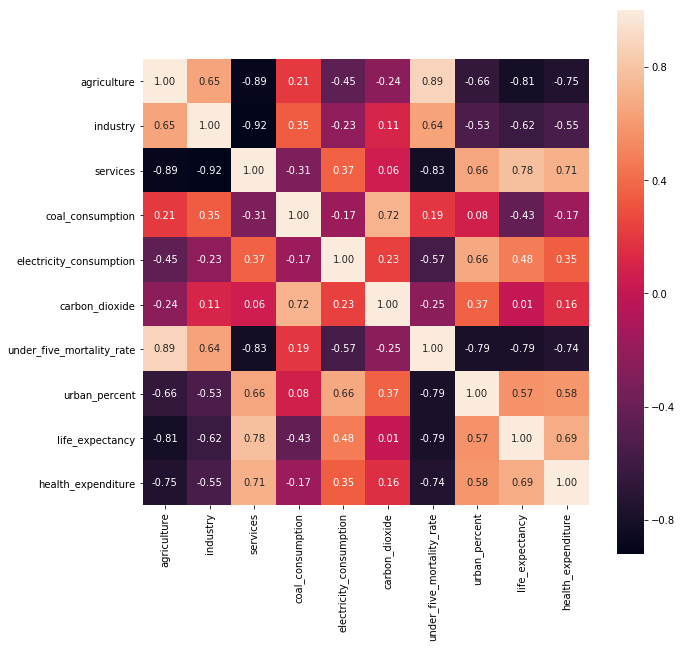

In [38]:
# show correlations
plt.figure(figsize = (10, 10))
sns.heatmap(filtered_economy_data.corr(), annot = True, fmt = ".2f", square = True)

plt.show()

We see that `under_five_mortality_rate` has a `strong` (and positive) correlation with `agriculture`. It can be interpreted as quality of foods. U5MR has `significant` (and positive) correlation with `industry` and `strong` (and negative) correlation with `services` (which includes health care)

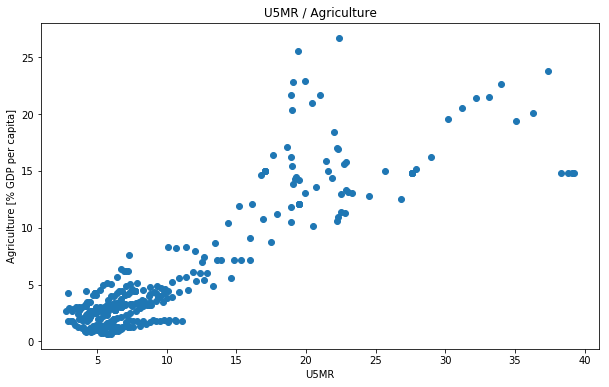

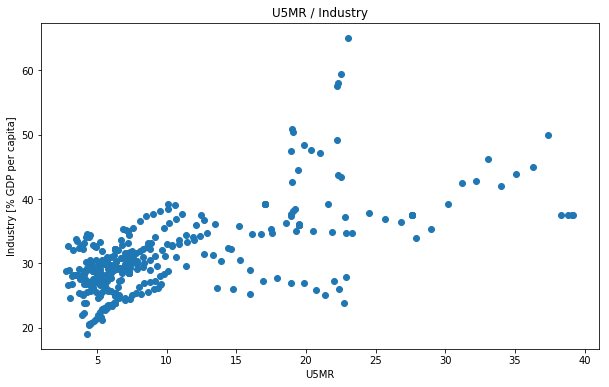

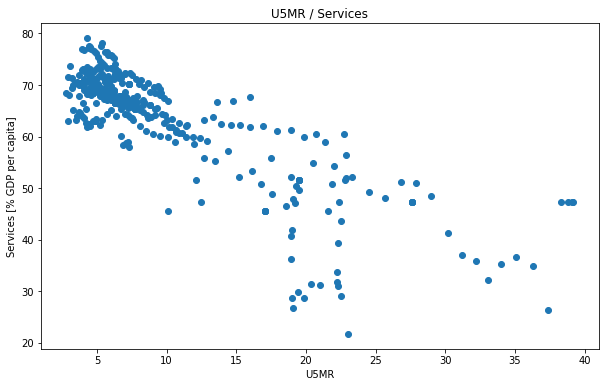

In [39]:
show_scatter(filtered_economy_data.under_five_mortality_rate, filtered_economy_data.agriculture, "U5MR", "Agriculture [% GDP per capita]", "U5MR / Agriculture")
show_scatter(filtered_economy_data.under_five_mortality_rate, filtered_economy_data.industry, "U5MR", "Industry [% GDP per capita]", "U5MR / Industry")
show_scatter(filtered_economy_data.under_five_mortality_rate, filtered_economy_data.services, "U5MR", "Services [% GDP per capita]", "U5MR / Services")

From the other side `health_expenditure` seems to decreases the U5MR in these countries. It has strong positive correlation coefficient with U5MR.
Life in the cities also reduces mortality of children under 5 years old.

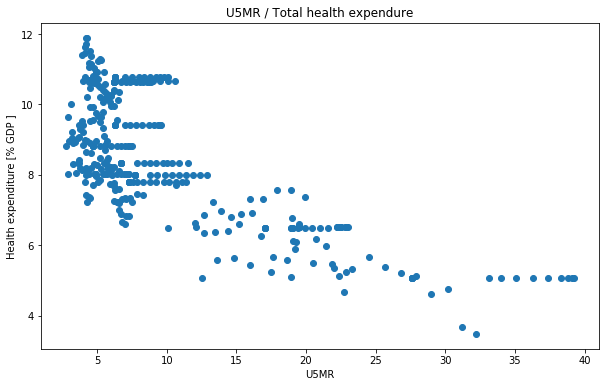

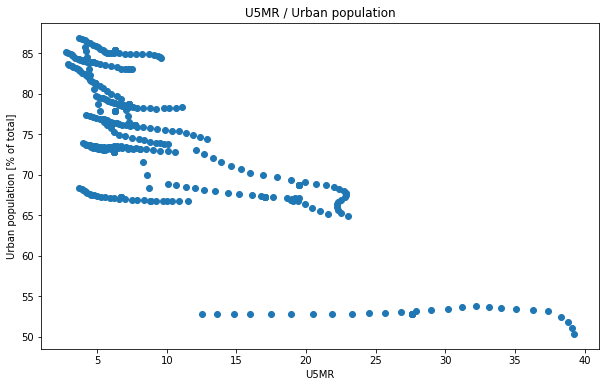

In [40]:
show_scatter(filtered_economy_data.under_five_mortality_rate, filtered_economy_data.health_expenditure, "U5MR", "Health expenditure [% GDP ]", "U5MR / Total health expendure")
show_scatter(filtered_economy_data.under_five_mortality_rate, filtered_economy_data.urban_percent, "U5MR", "Urban population [% of total]", "U5MR / Urban population")

Lets check how life expectancy correlating with economy factors

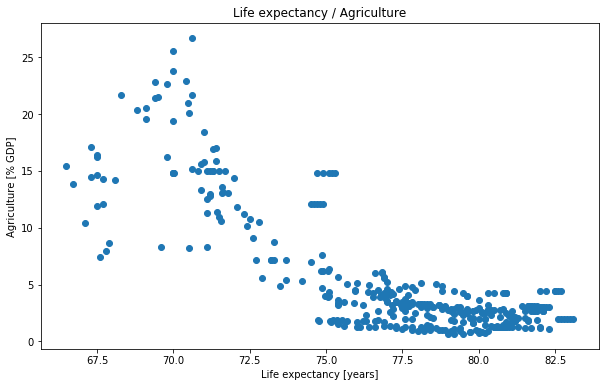

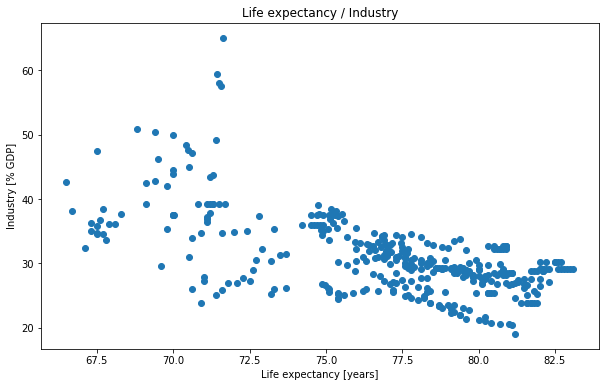

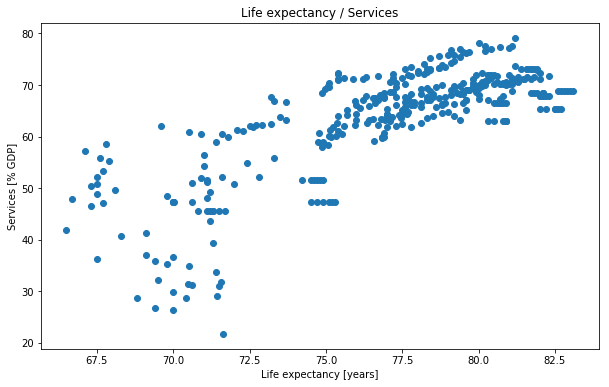

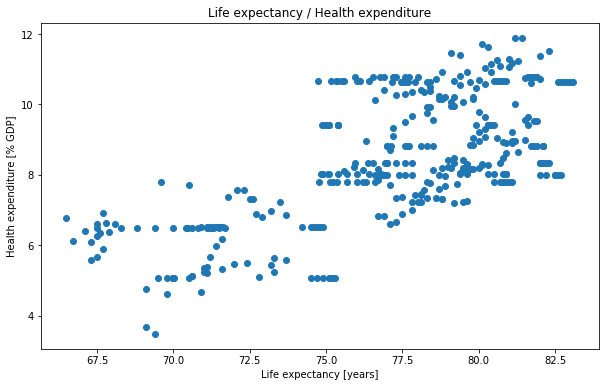

In [41]:
show_scatter(filtered_economy_data.life_expectancy, filtered_economy_data.agriculture, "Life expectancy [years]", "Agriculture [% GDP]", "Life expectancy / Agriculture")
show_scatter(filtered_economy_data.life_expectancy, filtered_economy_data.industry, "Life expectancy [years]", "Industry [% GDP]", "Life expectancy / Industry")
show_scatter(filtered_economy_data.life_expectancy, filtered_economy_data.services, "Life expectancy [years]", "Services [% GDP]", "Life expectancy / Services")
show_scatter(filtered_economy_data.life_expectancy, filtered_economy_data.health_expenditure, "Life expectancy [years]", "Health expenditure [% GDP]", "Life expectancy / Health expenditure")

Obviously here is the same situation: The countries where agriculture and industry are developed has descreased years of life. Otherwise in countries where services (which also include health care as mentioned above) have larger part of GDP life expectancy encreases.
This expectance also responds well when much money are spended for health services.

In [42]:
# get countries where under_five_mortality_rate (U5MR) is above and under than the mean rate in the period [1986 - 2016]
largest_U5MR = filtered_economy_data[filtered_economy_data.under_five_mortality_rate > filtered_economy_data.under_five_mortality_rate.mean()]
smallest_U5MR = filtered_economy_data[filtered_economy_data.under_five_mortality_rate < filtered_economy_data.under_five_mortality_rate.mean()]

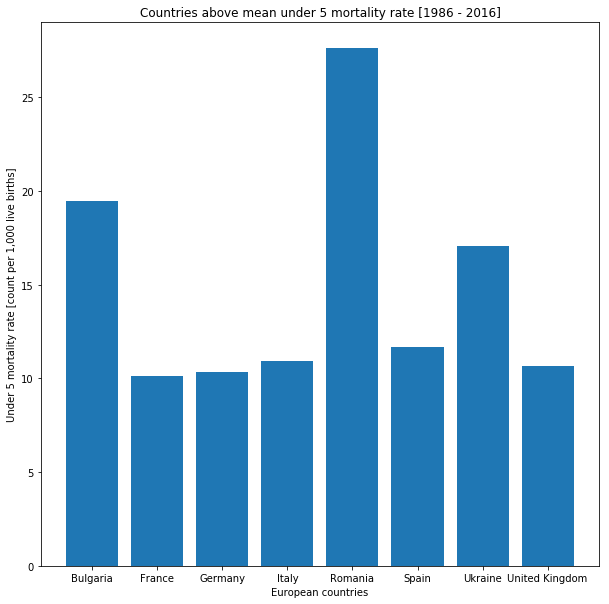

In [43]:
plt.figure(figsize = (10, 10))
plot_barchart(largest_U5MR.groupby(["country"])["under_five_mortality_rate"].mean().sort_values(ascending = False), 
              "Countries above mean under 5 mortality rate [1986 - 2016]", 
              "European countries", 
              "Under 5 mortality rate [count per 1,000 live births]")

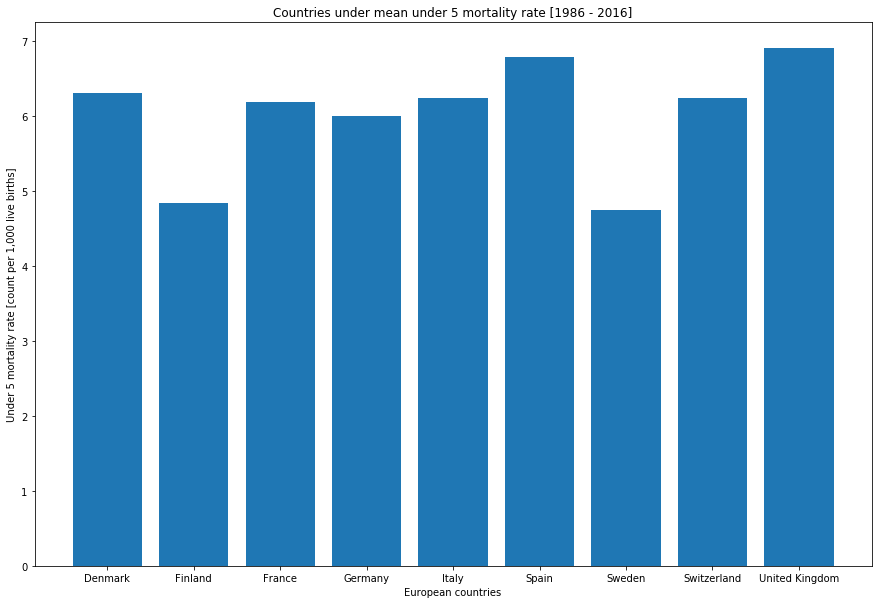

In [44]:
plt.figure(figsize = (15, 10))
plot_barchart(smallest_U5MR.groupby(["country"])["under_five_mortality_rate"].mean().sort_values(ascending = False), 
              "Countries under mean under 5 mortality rate [1986 - 2016]", 
              "European countries", 
              "Under 5 mortality rate [count per 1,000 live births]")

In [45]:
print(largest_U5MR.under_five_mortality_rate.idxmax())
print(smallest_U5MR.under_five_mortality_rate.idxmin())

('Romania', 1986)
('Sweden', 2011)


- We can see that the countries with the largest U5MR in period [1986 - 2016] are from the Balkan Peninsula and the countries with the smallest one are from the Scandinavian Peninsula

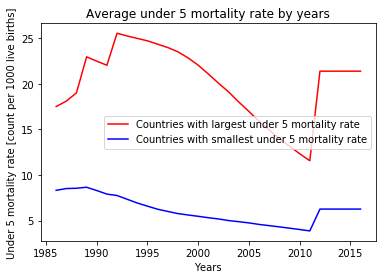

In [46]:
# largest vs smallest U5MR tenndences
largest_mor_rate_by_years = largest_U5MR.groupby('year')['under_five_mortality_rate'].mean()
smallest_mor_rate_by_years = smallest_U5MR.groupby('year')['under_five_mortality_rate'].mean()
show_line_plot(
    *[(largest_mor_rate_by_years.index, largest_mor_rate_by_years, 'r', "Countries with largest under 5 mortality rate"),
      (smallest_mor_rate_by_years.index, smallest_mor_rate_by_years, 'b', "Countries with smallest under 5 mortality rate")
     ], y_label = "Under 5 mortality rate [count per 1000 live births]", title = "Average under 5 mortality rate by years", legend = True
)

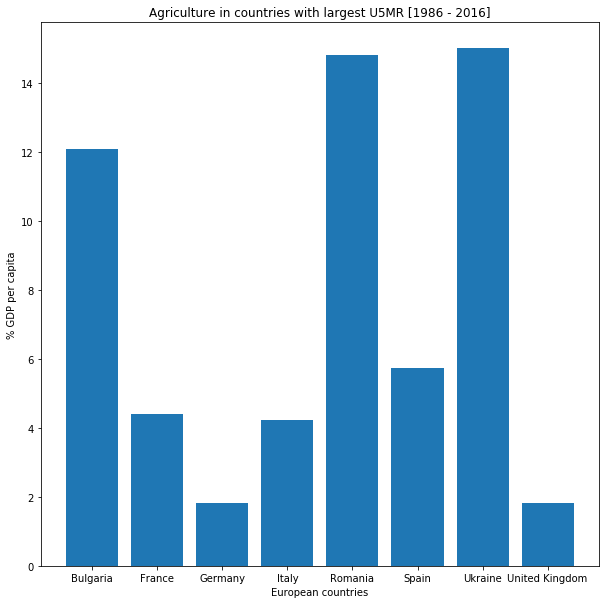

In [47]:
plt.figure(figsize = (10, 10))
plot_barchart(largest_U5MR.groupby(["country"])["agriculture"].mean().sort_values(ascending = False), 
              "Agriculture in countries with largest U5MR [1986 - 2016]", 
              "European countries", 
              "% GDP per capita")

## 2. Food and drink

### 2.1. Problem definition
How do our choices in food and drinks affect our overall health?

### 2.2. Data acquisition
- food_consumption
- sugar_consumption
- alcohol_consumption
- cholesterol_male
- cholesterol_female
- blood_pressure_male
- blood_pressure_female
<br><br>


Source: [Gapminder](https://www.gapminder.org)

### 2.3. Read, tidy,  clean and validate data

#### 2.3.1 Process food_consumption [kilocalories per person a day]

In [48]:
food_data = pd.read_excel("data/food_consumption.xlsx")
food_data.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2233.67,2248.11,2163.45,2275.92,2258.32,2258.64,2265.64,2345.52,2407.55,2418.76,...,2790.70,2891.76,2832.07,2861.18,2864.93,2838.24,2849.36,2917.08,2914.95,2879.57
Algeria,1700.44,1657.72,1624.03,1644.20,1704.08,1685.77,1767.02,1831.98,1825.67,1790.36,...,2904.07,2957.91,2928.84,3003.63,3034.33,3073.26,3090.13,3059.24,3101.20,3153.38


In [49]:
food_data = column_from_index(food_data)
food_data = melt_data(food_data, "food_consumption")
food_data = convert_year_column(food_data)
food_data.head()

,country,year,food_consumption
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,2233.67
4,Algeria,1961,1700.44


#### 2.3.2 Process sugar_consumption (g per person a day)

In [50]:
sugar_data = pd.read_excel("data/sugar_consumption.xlsx")
sugar_data.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,30.14,30.14,32.88,35.62,35.62,35.62,38.36,38.36,38.36,38.36,...,54.80,68.49,60.27,60.27,57.53,65.75,68.49,71.23,65.75,65.75
Algeria,46.58,49.32,46.58,49.32,46.58,46.58,49.32,49.32,46.58,43.84,...,73.97,73.97,79.45,54.80,60.27,82.19,79.45,82.19,84.93,84.93


In [51]:
sugar_data = column_from_index(sugar_data)
sugar_data = melt_data(sugar_data, "sugar_consumption")
sugar_data = convert_year_column(sugar_data)
sugar_data.head()

,country,year,sugar_consumption
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,30.14
4,Algeria,1961,46.58


#### 2.3.3. Process alcohol_consumption [per adult (15+), litres]

In [52]:
alcohol_data = pd.read_excel("data/alcohol_consumption.xlsx")
alcohol_data.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,0.03
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.68,NaN,NaN,7.29
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,0.69
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.48,NaN,NaN,10.17
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.40,NaN,NaN,5.57


In [53]:
alcohol_data = column_from_index(alcohol_data)
alcohol_data = melt_data(alcohol_data, "alcohol_consumption")
alcohol_data = convert_year_column(alcohol_data)
alcohol_data.head()

,country,year,alcohol_consumption
0,Afghanistan,1985,NaN
1,Albania,1985,NaN
2,Algeria,1985,NaN
3,Andorra,1985,NaN
4,Angola,1985,NaN


#### 2.3.4 Process blood_pressure_male [SBP (mm Hg), age standardized mean]

In [54]:
blood_presure_male_data = pd.read_excel("data/blood_pressure_male.xlsx")
blood_presure_male_data.head()

,"SBP male (mm Hg), age standardized mean",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,125.1991,125.2157,125.2491,125.3090,125.3442,125.3584,125.4051,125.4011,125.3434,...,124.5021,124.5272,124.5751,124.7101,124.8847,125.0410,125.2112,125.3705,125.5242,125.6672
1,Albania,132.9270,133.0296,133.1459,133.1868,133.2048,133.2577,133.2506,133.2931,133.2701,...,131.8057,131.9823,132.2176,132.4619,132.7057,132.9587,133.1678,133.3954,133.6220,133.8207
2,Algeria,132.4093,132.1710,131.9649,131.7835,131.6161,131.4345,131.2326,131.0388,130.8046,...,129.1106,129.2023,129.2934,129.4057,129.5286,129.6348,129.7574,129.8688,129.9521,130.0443
3,Andorra,140.8585,140.1076,139.3727,138.6457,137.9525,137.3192,136.7997,136.3876,136.0668,...,133.1220,132.9088,132.7174,132.5272,132.3629,132.1891,132.0176,131.8713,131.7202,131.5517
4,Angola,135.1761,134.8481,134.5637,134.2894,134.0817,133.9246,133.7804,133.6974,133.6655,...,132.4099,132.4370,132.4967,132.5976,132.6973,132.8160,132.9760,133.1660,133.3769,133.5843


In [55]:
blood_presure_male_data = rename_country_column(blood_presure_male_data)
blood_presure_male_data = melt_data(blood_presure_male_data, "blood_presure_male")
blood_presure_male_data = convert_year_column(blood_presure_male_data)
blood_presure_male_data.head()

,country,year,blood_presure_male
0,Afghanistan,1980,125.1991
1,Albania,1980,132.9270
2,Algeria,1980,132.4093
3,Andorra,1980,140.8585
4,Angola,1980,135.1761


#### 2.3.5 Process blood_pressure_female [SBP (mm Hg), age standardized mean]

In [56]:
blood_presure_female_data = pd.read_excel("data/blood_pressure_female.xlsx")
blood_presure_female_data.head()

,"SBP female (mm Hg), age standardized mean",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,122.0799,122.2677,122.4872,122.7061,122.9095,123.0919,123.2892,123.4189,123.5137,...,123.9363,124.0053,124.0746,124.2085,124.3654,124.5190,124.6693,124.8126,124.9512,125.0857
1,Albania,132.2048,132.1113,132.0324,131.9356,131.8073,131.6686,131.5425,131.3945,131.2248,...,128.9691,128.9903,129.0310,129.0609,129.0753,129.1085,129.1311,129.1600,129.1707,129.1636
2,Algeria,130.8334,130.9079,130.9790,131.0057,131.0516,131.0851,131.0921,131.0759,131.0466,...,130.5142,130.4688,130.4379,130.4024,130.3730,130.3041,130.2373,130.1542,130.0306,129.9049
3,Andorra,136.6040,135.9730,135.3111,134.6178,133.9310,133.2704,132.6709,132.1498,131.6667,...,126.1448,125.6144,125.1168,124.6455,124.1528,123.6848,123.2260,122.7688,122.2979,121.8377
4,Angola,130.0896,129.9897,129.8756,129.7749,129.7096,129.6741,129.6562,129.6698,129.7407,...,129.8515,129.8701,129.8940,129.9282,129.9443,129.9746,130.0129,130.0599,130.1006,130.1247


In [57]:
blood_presure_female_data = rename_country_column(blood_presure_female_data)
blood_presure_female_data = melt_data(blood_presure_female_data, "blood_presure_female")
blood_presure_female_data = convert_year_column(blood_presure_female_data)
blood_presure_female_data.head()

,country,year,blood_presure_female
0,Afghanistan,1980,122.0799
1,Albania,1980,132.2048
2,Algeria,1980,130.8334
3,Andorra,1980,136.6040
4,Angola,1980,130.0896


#### 2.3.6 Process cholesterol_male [TC (mmol/L), age standardized mean]

In [58]:
cholesterol_male_data = pd.read_excel("data/cholesterol_male.xlsx")
cholesterol_male_data.head()

,"TC male (mmol/L), age standardized mean",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,4.582847,4.575943,4.570482,4.566239,4.561473,4.555119,4.550215,4.540510,4.524835,...,4.251635,4.221958,4.190959,4.171098,4.155508,4.139688,4.127613,4.115781,4.106099,4.095997
1,Albania,5.006371,5.001727,4.995893,4.988104,4.981580,4.977619,4.971681,4.968798,4.964878,...,4.895632,4.898920,4.903275,4.905689,4.906776,4.904870,4.900919,4.897351,4.894249,4.890784
2,Algeria,4.925933,4.919521,4.914258,4.913837,4.911134,4.907856,4.901825,4.895566,4.884584,...,4.743488,4.734174,4.722526,4.711596,4.701297,4.694086,4.686355,4.678111,4.671032,4.663696
3,Andorra,6.178972,6.143850,6.108996,6.077504,6.047321,6.018569,5.991545,5.964697,5.941315,...,5.691342,5.671508,5.653838,5.636606,5.623507,5.609258,5.594193,5.582063,5.570358,5.557206
4,Angola,4.524107,4.509693,4.496962,4.484571,4.475721,4.469586,4.461452,4.457127,4.454220,...,4.325931,4.322815,4.321519,4.325346,4.330437,4.336073,4.346258,4.359311,4.375734,4.393710


In [59]:
cholesterol_male_data = rename_country_column(cholesterol_male_data)
cholesterol_male_data = melt_data(cholesterol_male_data, "cholesterol_male")
cholesterol_male_data = convert_year_column(cholesterol_male_data)
cholesterol_male_data.head()

,country,year,cholesterol_male
0,Afghanistan,1980,4.582847
1,Albania,1980,5.006371
2,Algeria,1980,4.925933
3,Andorra,1980,6.178972
4,Angola,1980,4.524107


#### 2.3.7 Process cholesterol_female [TC male (mmol/L), age standardized mean]

In [60]:
cholesterol_female_data = pd.read_excel("data/cholesterol_female.xlsx")
cholesterol_female_data.head()

,"TC female (mmol/L), age standardized mean",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,4.644476,4.637118,4.630770,4.625318,4.619873,4.613289,4.607698,4.598080,4.583443,...,4.356148,4.333604,4.309802,4.295170,4.283724,4.271746,4.262364,4.253473,4.246427,4.239035
1,Albania,5.039529,5.036610,5.033352,5.028138,5.022292,5.018456,5.012306,5.008334,5.002822,...,4.916494,4.917402,4.919429,4.918646,4.915379,4.909980,4.902183,4.895111,4.888237,4.881235
2,Algeria,4.976215,4.975257,4.974508,4.976556,4.976963,4.977419,4.974378,4.971097,4.963965,...,4.873433,4.866559,4.857580,4.848951,4.841351,4.836602,4.831645,4.826501,4.821301,4.815735
3,Andorra,6.132187,6.101291,6.069412,6.038793,6.008447,5.977998,5.948506,5.918512,5.890226,...,5.592350,5.568902,5.548213,5.529060,5.513778,5.499101,5.484156,5.474519,5.465222,5.456065
4,Angola,4.789354,4.769557,4.751330,4.733550,4.719231,4.707431,4.693793,4.683528,4.674458,...,4.511637,4.505080,4.499903,4.499115,4.498331,4.498226,4.501854,4.508352,4.517577,4.528061


In [61]:
cholesterol_female_data = rename_country_column(cholesterol_female_data)
cholesterol_female_data = melt_data(cholesterol_female_data, "cholesterol_female")
cholesterol_female_data = convert_year_column(cholesterol_female_data)
cholesterol_female_data.head()

,country,year,cholesterol_female
0,Afghanistan,1980,4.644476
1,Albania,1980,5.039529
2,Algeria,1980,4.976215
3,Andorra,1980,6.132187
4,Angola,1980,4.789354


#### 2.3.8. Process bmi_male_data

In [62]:
bmi_male_data = pd.read_excel("data/bmi_male.xlsx")
bmi_male_data.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,21.48678,21.46552,21.45145,21.43822,21.42734,21.41222,21.40132,21.37679,21.34018,...,20.75469,20.69521,20.62643,20.59848,20.58706,20.57759,20.58084,20.58749,20.60246,20.62058
1,Albania,25.22533,25.23981,25.25636,25.27176,25.27901,25.28669,25.29451,25.30217,25.30450,...,25.46555,25.55835,25.66701,25.77167,25.87274,25.98136,26.08939,26.20867,26.32753,26.44657
2,Algeria,22.25703,22.34745,22.43647,22.52105,22.60633,22.69501,22.76979,22.84096,22.90644,...,23.69486,23.77659,23.86256,23.95294,24.05243,24.15957,24.27001,24.38270,24.48846,24.59620
3,Andorra,25.66652,25.70868,25.74681,25.78250,25.81874,25.85236,25.89089,25.93414,25.98477,...,26.75078,26.83179,26.92373,27.02525,27.12481,27.23107,27.32827,27.43588,27.53363,27.63048
4,Angola,20.94876,20.94371,20.93754,20.93187,20.93569,20.94857,20.96030,20.98025,21.01375,...,21.31954,21.37480,21.43664,21.51765,21.59924,21.69218,21.80564,21.93881,22.08962,22.25083


In [63]:
bmi_male_data = rename_country_column(bmi_male_data)
bmi_male_data = melt_data(bmi_male_data, "bmi_male")
bmi_male_data = convert_year_column(bmi_male_data)
bmi_male_data.head()

,country,year,bmi_male
0,Afghanistan,1980,21.48678
1,Albania,1980,25.22533
2,Algeria,1980,22.25703
3,Andorra,1980,25.66652
4,Angola,1980,20.94876


#### 2.3.8. Process bmi_female_data

In [64]:
bmi_female_data = pd.read_excel("data/bmi_female.xlsx")
bmi_female_data.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,20.44348,20.47765,20.52292,20.56493,20.60867,20.64796,20.68983,20.70902,20.71512,...,20.61717,20.61850,20.61353,20.65274,20.70828,20.76927,20.83858,20.91021,20.99060,21.07402
1,Albania,25.17427,25.19088,25.20032,25.21906,25.22359,25.21257,25.20939,25.18918,25.16965,...,25.06254,25.12797,25.20332,25.27082,25.33198,25.39804,25.46525,25.53328,25.59394,25.65726
2,Algeria,23.67764,23.80702,23.92626,24.03604,24.13630,24.24213,24.33652,24.42523,24.50904,...,25.40139,25.49389,25.59477,25.69948,25.81168,25.93081,26.03886,26.15054,26.26096,26.36841
3,Andorra,25.67324,25.69018,25.69922,25.70089,25.70584,25.70877,25.71239,25.72437,25.74523,...,26.07432,26.10622,26.14707,26.19542,26.23892,26.28851,26.32247,26.36846,26.40095,26.43196
4,Angola,20.06763,20.12766,20.19464,20.26439,20.34110,20.42624,20.51389,20.60929,20.70945,...,21.76054,21.91293,22.07646,22.26093,22.44571,22.63536,22.83412,23.04406,23.26330,23.48431


In [65]:
bmi_female_data = rename_country_column(bmi_female_data)
bmi_female_data = melt_data(bmi_female_data, "bmi_female")
bmi_female_data = convert_year_column(bmi_female_data)
bmi_female_data.head()

,country,year,bmi_female
0,Afghanistan,1980,20.44348
1,Albania,1980,25.17427
2,Algeria,1980,23.67764
3,Andorra,1980,25.67324
4,Angola,1980,20.06763


In [66]:
# merge all processed food datasets into one df
all_food_data = merge_datasets([
    food_data, sugar_data, alcohol_data, 
    blood_presure_male_data, blood_presure_female_data, 
    cholesterol_male_data, cholesterol_female_data,
    bmi_male_data, bmi_female_data, life_exp_data
])

# set multiindex
all_food_data.set_index(["country", "year"], verify_integrity = True, inplace = True)

all_food_data.head()

food_consumption  sugar_consumption  alcohol_consumption  \
country  year                                                             
Abkhazia 1800               NaN                NaN                  NaN   
         1801               NaN                NaN                  NaN   
         1802               NaN                NaN                  NaN   
         1803               NaN                NaN                  NaN   
         1804               NaN                NaN                  NaN   

               blood_presure_male  blood_presure_female  cholesterol_male  \
country  year                                                               
Abkhazia 1800                 NaN                   NaN               NaN   
         1801                 NaN                   NaN               NaN   
         1802                 NaN                   NaN               NaN   
         1803                 NaN                   NaN               NaN   
         1804                 NaN                   NaN               NaN   

               cholesterol_female  bmi_male  bmi_female  life_expectancy  
country  year                                                             
Abkhazia 1800                 NaN       NaN         NaN              NaN  
         1801                 NaN       NaN         NaN              NaN  
         1802                 NaN       NaN         NaN              NaN  
         1803                 NaN       NaN         NaN              NaN  
         1804                 NaN       NaN         NaN              NaN

In [67]:
# select countries
filtered_food_data = all_food_data[all_food_data.index.get_level_values('country').isin(countries)]
filtered_food_data.shape

(2604, 10)

In [68]:
# select last 30 years
filtered_food_data = filtered_food_data[filtered_food_data.index.get_level_values('year') >= 1986]
filtered_food_data.shape

(372, 10)

In [69]:
filtered_food_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 372 entries, (Bulgaria, 1986) to (United Kingdom, 2016)
Data columns (total 10 columns):
food_consumption        258 non-null float64
sugar_consumption       222 non-null float64
alcohol_consumption     36 non-null float64
blood_presure_male      276 non-null float64
blood_presure_female    276 non-null float64
cholesterol_male        276 non-null float64
cholesterol_female      276 non-null float64
bmi_male                276 non-null float64
bmi_female              276 non-null float64
life_expectancy         372 non-null float64
dtypes: float64(10)
memory usage: 34.6+ KB


In [70]:
# fill NaN values with the mean value of each column grouped by `country`
filtered_food_data = fill_na(filtered_food_data, [
    'food_consumption', 'sugar_consumption', 'alcohol_consumption', 'blood_presure_male',
    'blood_presure_female', 'cholesterol_male', 'cholesterol_female',
    'bmi_male', 'bmi_female'
])

filtered_food_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 372 entries, (Bulgaria, 1986) to (United Kingdom, 2016)
Data columns (total 10 columns):
food_consumption        372 non-null float64
sugar_consumption       372 non-null float64
alcohol_consumption     372 non-null float64
blood_presure_male      372 non-null float64
blood_presure_female    372 non-null float64
cholesterol_male        372 non-null float64
cholesterol_female      372 non-null float64
bmi_male                372 non-null float64
bmi_female              372 non-null float64
life_expectancy         372 non-null float64
dtypes: float64(10)
memory usage: 34.6+ KB


### 2.4. Exploratory data analysis

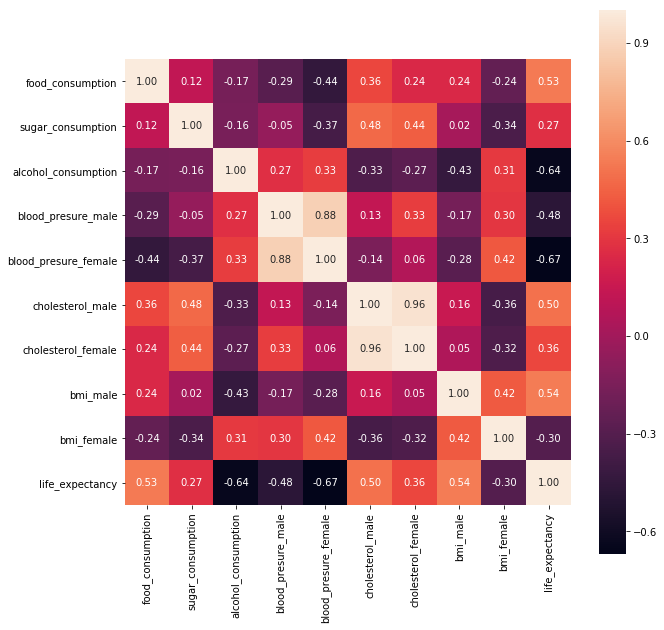

In [71]:
# show correlations
plt.figure(figsize = (10, 10))
sns.heatmap(filtered_food_data.corr(), annot = True, fmt = ".2f", square = True)

plt.show()

We can see that life expectancy decreases when alcohol consumption is high.

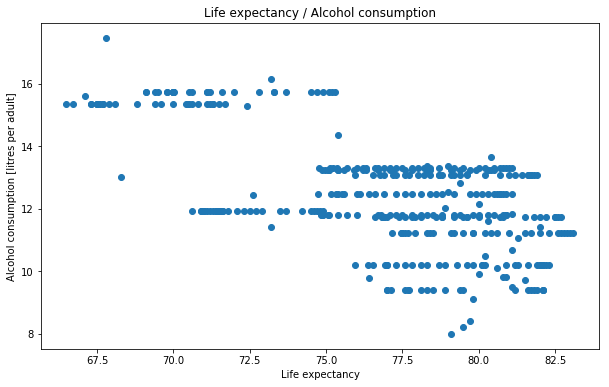

In [72]:
show_scatter(filtered_food_data.life_expectancy, filtered_food_data.alcohol_consumption, "Life expectancy", "Alcohol consumption [litres per adult]", "Life expectancy / Alcohol consumption")